In [1]:
import sys
import logging

logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

def add_path(newPath:str) -> str:
    """
    Adds newPath to the existing sys path, if needed.
    :param newPath: gets added temporarily to the PYTHONPATH.
    :return: updated string
    """
    if newPath in sys.path:
        logger.warning(f'path: {newPath} is already on sys.path. (No action taken.)')
        return sys.path
    else:
        logger.debug(f'Adding new path: {newPath} to sys.path.')
        sys.path.append(newPath)
    return sys.path

add_path(r'C:\Users\Owner\PycharmProjects\Utilities')

DEBUG:__main__:Adding new path: C:\Users\Owner\PycharmProjects\Utilities to sys.path.


['C:\\Users\\Owner\\PycharmProjects\\DataScience',
 'C:\\Users\\Owner\\Anaconda3\\python37.zip',
 'C:\\Users\\Owner\\Anaconda3\\DLLs',
 'C:\\Users\\Owner\\Anaconda3\\lib',
 'C:\\Users\\Owner\\Anaconda3',
 '',
 'C:\\Users\\Owner\\AppData\\Roaming\\Python\\Python37\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\Owner\\.ipython',
 'C:\\Users\\Owner\\PycharmProjects\\Utilities']

# Step 1. Read in data

In [2]:
from PandasUtil import PandasUtil
pu = PandasUtil()
fn = r'C:\Users\Owner\Documents\Udemy\ML-Classification-Package\ML Classification Package\3. Logisitic Regression\Facebook_Ads_2.csv'
df = pu.read_df_from_csv(csv_file_name=fn, header=0, enc='ISO-8859-1')
df.tail(10)

DEBUG:matplotlib:$HOME=C:\Users\Owner
DEBUG:matplotlib:CONFIGDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib:matplotlib data path: C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\Owner\Anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.0.2
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importl

DEBUG:matplotlib:CACHEDIR=C:\Users\Owner\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Owner\.matplotlib\fontlist-v300.json


,Names,emails,Country,Time Spent on Site,Salary,Clicked
489,Gloria,Curabitur.egestas.nunc@fermentumfermentum.ca,Gambia,23.865371,23439.86782,0
490,Jonah,augue@risusNuncac.co.uk,Myanmar,34.828303,50151.32622,1
491,Merrill,dolor.sit@turpisIn.com,Egypt,37.173216,63750.41558,1
492,Nolan,Donec.at@neccursus.co.uk,Latvia,5.000000,47329.56584,0
493,Winter,egestas.urna.justo@maurissagittis.edu,Wallis and Futuna,24.615228,34721.74862,0
494,Rigel,egestas.blandit.Nam@semvitaealiquam.com,Sao Tome and Principe,19.222746,44969.13495,0
495,Walter,ligula@Cumsociis.ca,Nepal,22.665662,41686.20425,0
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,35.320239,23989.80864,0
497,Pearl,penatibus.et@massanonante.com,Philippines,26.539170,31708.57054,0
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,32.386148,74331.35442,1


# Step 2. Explore and Visualize data


In [3]:
from PlotUtil import PlotUtil
from matplotlib import pyplot as plt

pl = PlotUtil(plt)

pu.get_rowCount_colCount(df)
df_clicked = pu.select(df=df, column_name='Clicked', match_me=1)

clicked_cnt = len(df_clicked)

logger.info (f'Clicked count: {clicked_cnt}.')
logger.info (f'Only {clicked_cnt/len(df) * 100 : .2f} % of the ads were clicked')

pl.scatter_plot(df, xlabel_col_name='Time Spent on Site', ylabel_col_name='Salary', zlabel_col_name='Clicked')
plt.show()

pl.boxplot(df, xlabel='Clicked', ylabel='Time Spent on Site')
pl.boxplot(df, xlabel='Clicked', ylabel='Salary')

plt.show()
pl.historgram_plot(df, xlabel='Time Spent on Site', bins=20, return_function_do_not_plot=False)
pl.historgram_plot(df, xlabel='Salary', bins=20, return_function_do_not_plot=False)

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:PandasUtil:df has 499 rows and 6 columns.
INFO:__main__:Clicked count: 250.
INFO:__main__:Only  50.10 % of the ads were clicked
DEBUG:PlotUtil:column named Time Spent on Site : 0      25.649648
1      32.456107
2      20.945978
3      54.039325
4      34.249729
         ...    
494    19.222746
495    22.665662
496    35.320239
497    26.539170
498    32.386148
Name: Time Spent on Site, Length: 499, dtype: float64
DEBUG:PlotUtil:column named Salary : 0      55330.06006
1      79049.07674
2      41098.60826
3      37143.35536
4      37355.11276
          ...     
494    44969.13495
495    41686.20425
496    23989.80864
497    31708.57054
498    74331.35442
Name: Salary, Length: 499, dtype: float64


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


# Step 3. Clean the data

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


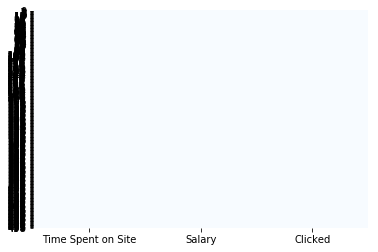

In [4]:
pu.drop_col(df=df, columns=['Names', 'emails', 'Country'], is_in_place=True)
df.head()
pl.null_heatmap(df)

# Fit the data
## Define X and y

In [5]:
target_col = 'Clicked'
X = pu.drop_col(df, target_col, False).values

logger.debug(f'df without target col: {X[-10:]}')
y = df[target_col].values
logger.debug(f'target column: {y[-10:]}')

DEBUG:__main__:df without target col: [[2.38653708e+01 2.34398678e+04]
 [3.48283033e+01 5.01513262e+04]
 [3.71732155e+01 6.37504156e+04]
 [5.00000000e+00 4.73295658e+04]
 [2.46152275e+01 3.47217486e+04]
 [1.92227465e+01 4.49691349e+04]
 [2.26656616e+01 4.16862043e+04]
 [3.53202387e+01 2.39898086e+04]
 [2.65391702e+01 3.17085705e+04]
 [3.23861478e+01 7.43313544e+04]]
DEBUG:__main__:target column: [0 1 1 0 0 0 0 0 0 1]


## Scale the data

In [6]:
from DataScienceUtil import DataScienceUtil
X = DataScienceUtil.scale(X=X, f_scaler=None)
logger.debug(f'scaled X: {X[-10:]}')


DEBUG:__main__:scaled X: [[-0.99565436 -1.55281483]
 [ 0.20981483 -0.14473617]
 [ 0.4676582   0.57213175]
 [-3.07006494 -0.29348359]
 [-0.91320113 -0.95809719]
 [-1.50615103 -0.4179123 ]
 [-1.12757275 -0.59097004]
 [ 0.26390739 -1.52382503]
 [-0.701647   -1.11693508]
 [-0.05872127  1.12989966]]


## Should do very well on the training data

DEBUG:__main__:beginning of y_train (real data) is:   [1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 0]
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
DEBUG:__main__:classifier type is: <class 'sklearn.linear_model.logistic.LogisticRegression'>
DEBUG:__main__:beginning of y_predict (predicted) is: [1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0]
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x000001737D0C6908>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x000001737D0C6908>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:m

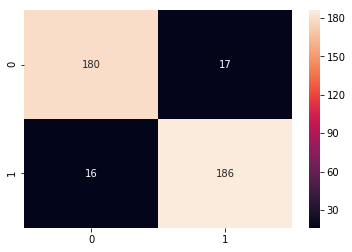

INFO:__main__:
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       197
           1       0.92      0.92      0.92       202

    accuracy                           0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = DataScienceUtil.train_test_split(X, y, test_frac=0.2, seed=10)
logger.debug(f'beginning of y_train (real data) is:   {y_train[:20]}')
classifier = DataScienceUtil.train_model(X_train, y_train, f_classifier=LogisticRegression, seed=0)
logger.debug(f'classifier type is: {type(classifier)}')
y_predict = DataScienceUtil.model_predict(classifier, X_train)
logger.debug(f'beginning of y_predict (predicted) is: {y_predict[:20]}')

cm = confusion_matrix(y_train, y_predict)
pl.heatmap(cm)

report = DataScienceUtil.classification_report(y_train, y_predict)
logger.info(f'\n{report}')

## Now on to the test data

DEBUG:__main__:beginning of y_test (test data) is:   [1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1]
C:\Users\Owner\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
DEBUG:__main__:classifier type is: <class 'sklearn.linear_model.logistic.LogisticRegression'>
DEBUG:__main__:beginning of y_predict (predicted) is: [1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1]
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x000001737D4D3E80>
DEBUG:matplotlib.colorbar:Using auto colorbar locator on colorbar
DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.MaxNLocator object at 0x000001737D4D3E80>
DEBUG:matplotlib.colorbar:Setting pcolormesh
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:ma

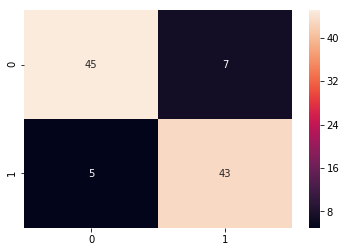

INFO:__main__:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        52
           1       0.86      0.90      0.88        48

    accuracy                           0.88       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.88      0.88      0.88       100



In [8]:

logger.debug(f'beginning of y_test (test data) is:   {y_test[:20]}')
classifier = DataScienceUtil.train_model(X_train, y_train, f_classifier=LogisticRegression, seed=0)
logger.debug(f'classifier type is: {type(classifier)}')
y_predict = DataScienceUtil.model_predict(classifier, X_test)
logger.debug(f'beginning of y_predict (predicted) is: {y_predict[:20]}')

cm = confusion_matrix(y_test, y_predict)
pl.heatmap(cm)

report = DataScienceUtil.classification_report(y_test, y_predict)
logger.info(f'\n{report}')

DEBUG:__main__:X_set shape is (100, 2). y_set shape is (100,)
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\Owner\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


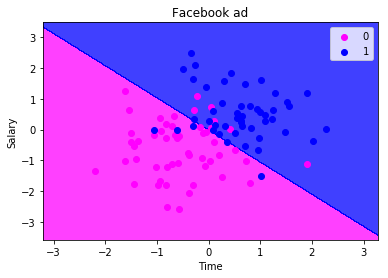

In [9]:
# PlotUtil.visualize_results(X_set=X_train, y_set=y_train, classifier=classifier, title="Facebook ad", x_label="Time", y_label="Salary")
logger.debug(f'X_set shape is {X_test.shape}. y_set shape is {y_test.shape}')
PlotUtil.visualize_results(X_set=X_test, y_set=y_test, classifier=classifier, title="Facebook ad", x_label="Time", y_label="Salary")